In [2]:
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 70)
import warnings
warnings.filterwarnings('ignore')


In [3]:

df = pd.read_parquet('input/nps_data_full.parquet',engine='fastparquet')

In [4]:
df_1 = df[['FB_UID','WEEK_COMMENCING','STORE_LOCATIONCLASS','RATING_NPS','FB_SENTIMENT','FB_CHANNEL']]

In [5]:
df_1['WEEK_COMMENCING'] = pd.to_datetime(df_1['WEEK_COMMENCING'],yearfirst=True)

In [6]:
# Group by day and calculate NPS for each day
grouped_data = df_1.groupby(df_1['WEEK_COMMENCING'].dt.date)

# Initialize empty lists to store NPS scores for each day
nps_scores = []

# Loop through each day's data
for day, group in grouped_data:
    sample_size = group['FB_UID'].count()
    promoter = group[group['RATING_NPS'] >= 9]['FB_UID'].count()
    detractor = group[group['RATING_NPS'] <= 6]['FB_UID'].count()

    # Calculate NPS for the current day
    percentage_promoters = (promoter / sample_size) * 100
    percentage_detractors = (detractor / sample_size) * 100

    NPS = percentage_promoters - percentage_detractors

    # Store the NPS score and the corresponding date in a list
    nps_scores.append({'Date': day, 'NPS': NPS})

# Create a new DataFrame with NPS scores for each day
nps_df = pd.DataFrame(nps_scores)

,RATING_NPS,FB_CHANNEL
0,9.0,Store
1,10.0,Delivery
2,1.0,Delivery
3,2.0,Delivery
4,10.0,Store
...,...,...
451586,8.0,Store
451587,10.0,Delivery
451588,9.0,Store
451589,3.0,Online


In [30]:

# Group by "FB_CHANNEL" and calculate NPS for each touchpoint
df_channel = df_1.copy()
df_channel = df_channel[['RATING_NPS','FB_CHANNEL']]
touchpoint_nps = df_channel.groupby('FB_CHANNEL')['RATING_NPS'].apply(lambda x: (x >= 9).sum() / len(x) - (x <= 6).sum() / len(x)).reset_index()
touchpoint_nps.rename(columns={'RATING_NPS': 'NPS'}, inplace=True)
touchpoint_nps['NPS']= touchpoint_nps['NPS']*100
touchpoint_nps

,FB_CHANNEL,NPS
0,CSC,-41.037736
1,Delivery,22.283767
2,Merch,-29.346338
3,Online,15.316842
4,Other,-53.240858
5,Store,59.835179
6,csc,-9.090909
7,other,-100.000000


<Axes: xlabel='FB_CHANNEL'>

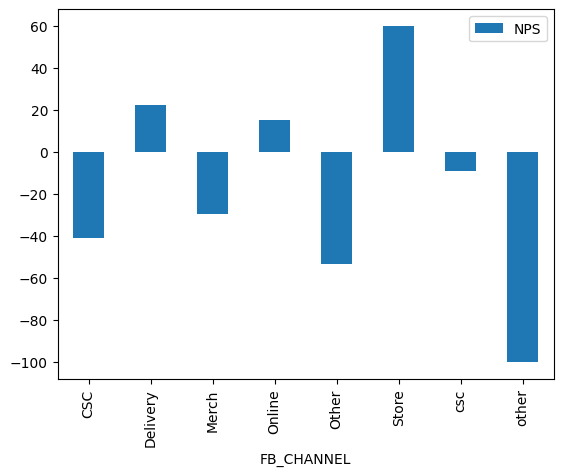

In [33]:
touchpoint_nps.plot.bar(x='FB_CHANNEL',y='NPS')